In [1]:
#adapted from: https://github.com/berenslab/pubmed-landscape/blob/main/scripts/05-rgm-pipeline-generate-colors.ipynb

import sys
sys.path.append("../code")


%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import time
import pickle

#import memory_profiler
#%load_ext memory_profiler

from pathlib import Path


%load_ext autoreload
%autoreload 2


In [2]:
import pubmed_landscape_src



from pubmed_landscape_src.plotting import (
    automatic_coloring,
    improved_coloring,
    years_coloring,
    plot_tsne_colors,
    plot_label_tags,
    plot_tsne_years,
)

In [3]:
with open('Emb_300k.npy','rb') as f:
    y_umap = np.load(f)
    y_umap_2 = np.load(f)
    y_umap_pca_6 = np.load(f)
    embedding_train_2 = np.load(f)
    idxs = np.load(f)
    
    
with open('data/PubMedBERT_embeddings_float16.npy', 'rb') as f:
    data = np.load(f)
    
X_train = data[idxs].astype(np.float32)

In [4]:

import pandas as pd
data_pd = pd.read_csv('data/pubmed_landscape_data.csv')

data_top = data_pd.head()

journals = data_pd['Journal']


In [5]:
"""
Description of colors and words below.

Colors:
-chosen_colors: colors chosen manually from Scanpy colors selection 
(originally from http://godsnotwheregodsnot.blogspot.com/2013/11/kmeans-color-quantization-seeding.html)

Words:
-words_capital: Words selected manually from the 100 most relevant words using threshold 0.1.
"""

# COLORS
chosen_colors = [
    "black",
    "#aeaa00",
    "#1CE6FF",
    "#FF34FF",
    "#FF4A46",
    "#008941",
    "#006FA6",
    "#0089A3",
    "#0000A6",
    "#B79762",
    "#004D43",
    "#8FB0FF",
    "#5A0007",
    "#BA0900",
    "#1B4400",
    "#4FC601",
    "#3B5DFF",
    "#00C2A0",
    "#549E79",
    "#BC23FF",
    "#C895C5",
    "#FF2F80",
    "#009271",
    "#00FECF",
    "#A4E804",
    "#FFB500",
    "#6B002C",
    "#FF9408",
    "#CC0744",
    "#D790FF",
    "#5B4534",
    "#E83000",
    "#6F0062",
    "#b65141",
    "#C20078",
    "#7A4900",
    "#FF90C9",
    "#6508ba",
]
# WORDS
words = [
    "cancer",
    "neuroscience",
    "cardiology",
    "ecology",
    "bioinformatics",
    "chemistry",
    "surgery",
    "environment",
    "material",
    "microbiology",
    "pediatric",
    "immunology",
    "psychology",
    "psychiatry",
    "genetics",
    "nutrition",
    "veterinary",
    "engineering",
    "education",
    "physics",
    "optics",
    "nursing",
    "neurology",
    "radiology",
    "ophthalmology",
    "gynecology",
    "rehabilitation",
    "pathology",
    "anesthesiology",
    "dermatology",
    "pharmacology",
    "physiology",
    "virology",
    "biochemistry",
    "computation",
    "infectious",
    "healthcare",
    "ethics",
]


In [6]:
colors_new_legend = dict(zip(words, chosen_colors))

In [7]:

#labels_new, colors_new = improved_coloring(journals, colors_new_legend)

In [8]:
#save results
#np.save("colors_new", colors_new)

#save results
#f = open("colors_new_legend.pkl","wb")
#pickle.dump(colors_new_legend,f)
#f.close()


<h1>Plot</h1>

In [9]:
# load
# legend colors
pickle_in = open("colors_new_legend.pkl", "rb")
colors_new_legend = pickle.load(pickle_in)

colors = np.load("colors_new.npy", allow_pickle=True)

print(colors.shape)

(20687150,)


In [10]:
colors_new = colors[idxs]

<h1>Plot t-SNE</h1>

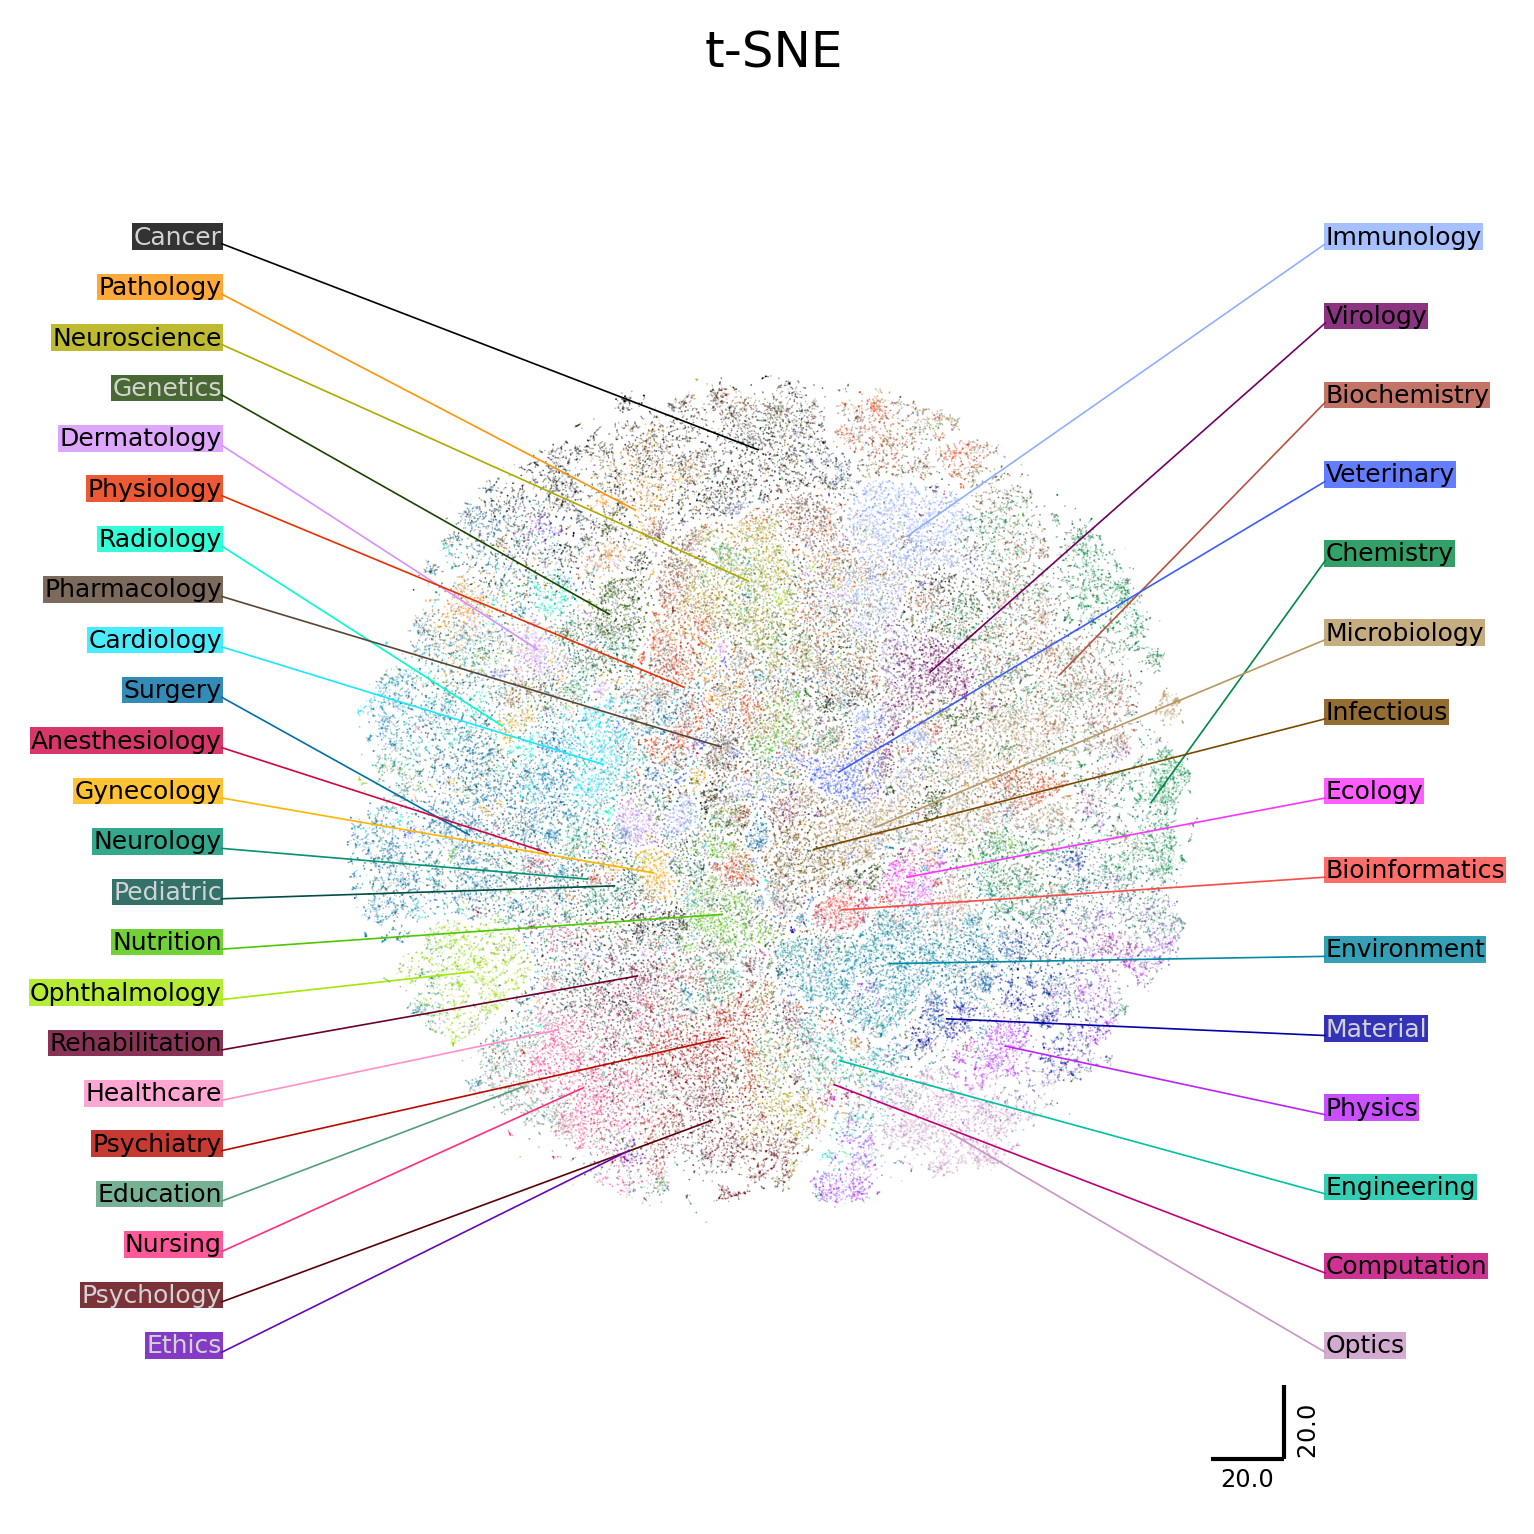

In [11]:
%matplotlib inline

from scale_bar import add_scalebar

fig, ax = plt.subplots(figsize=(5, 5), dpi=300, layout="constrained")

txtkwargs = dict(size=8, weight="bold", va="top", ha="left")
x_lim = (-150, 150)
y_lim = (-150, 150)

plot_tsne_colors(
    embedding_train_2, colors_new, x_lim=x_lim, y_lim=y_lim, ax=ax, plot_type=None
)

add_scalebar(ax, loc=4, barwidth=1, matchx=False, matchy=False, 
                     sizey=20, sizex=20, 
                     labelx='20.0', labely='20.0',
                    fontsize='xx-small',
                    hidex=True, hidey=True)

plt.title(r't-SNE')

plot_label_tags(
    embedding_train_2,
    colors_new,
    colors_new_legend,
    x_lim=x_lim,
    y_lim=y_lim,
    ax=ax,
    fontsize=6,
    rs=2,
    subset_size = 50000
)



fig.savefig("document_fig/tsne_colored_by_labels.png", dpi=400)

<h1>plot umap</h1>

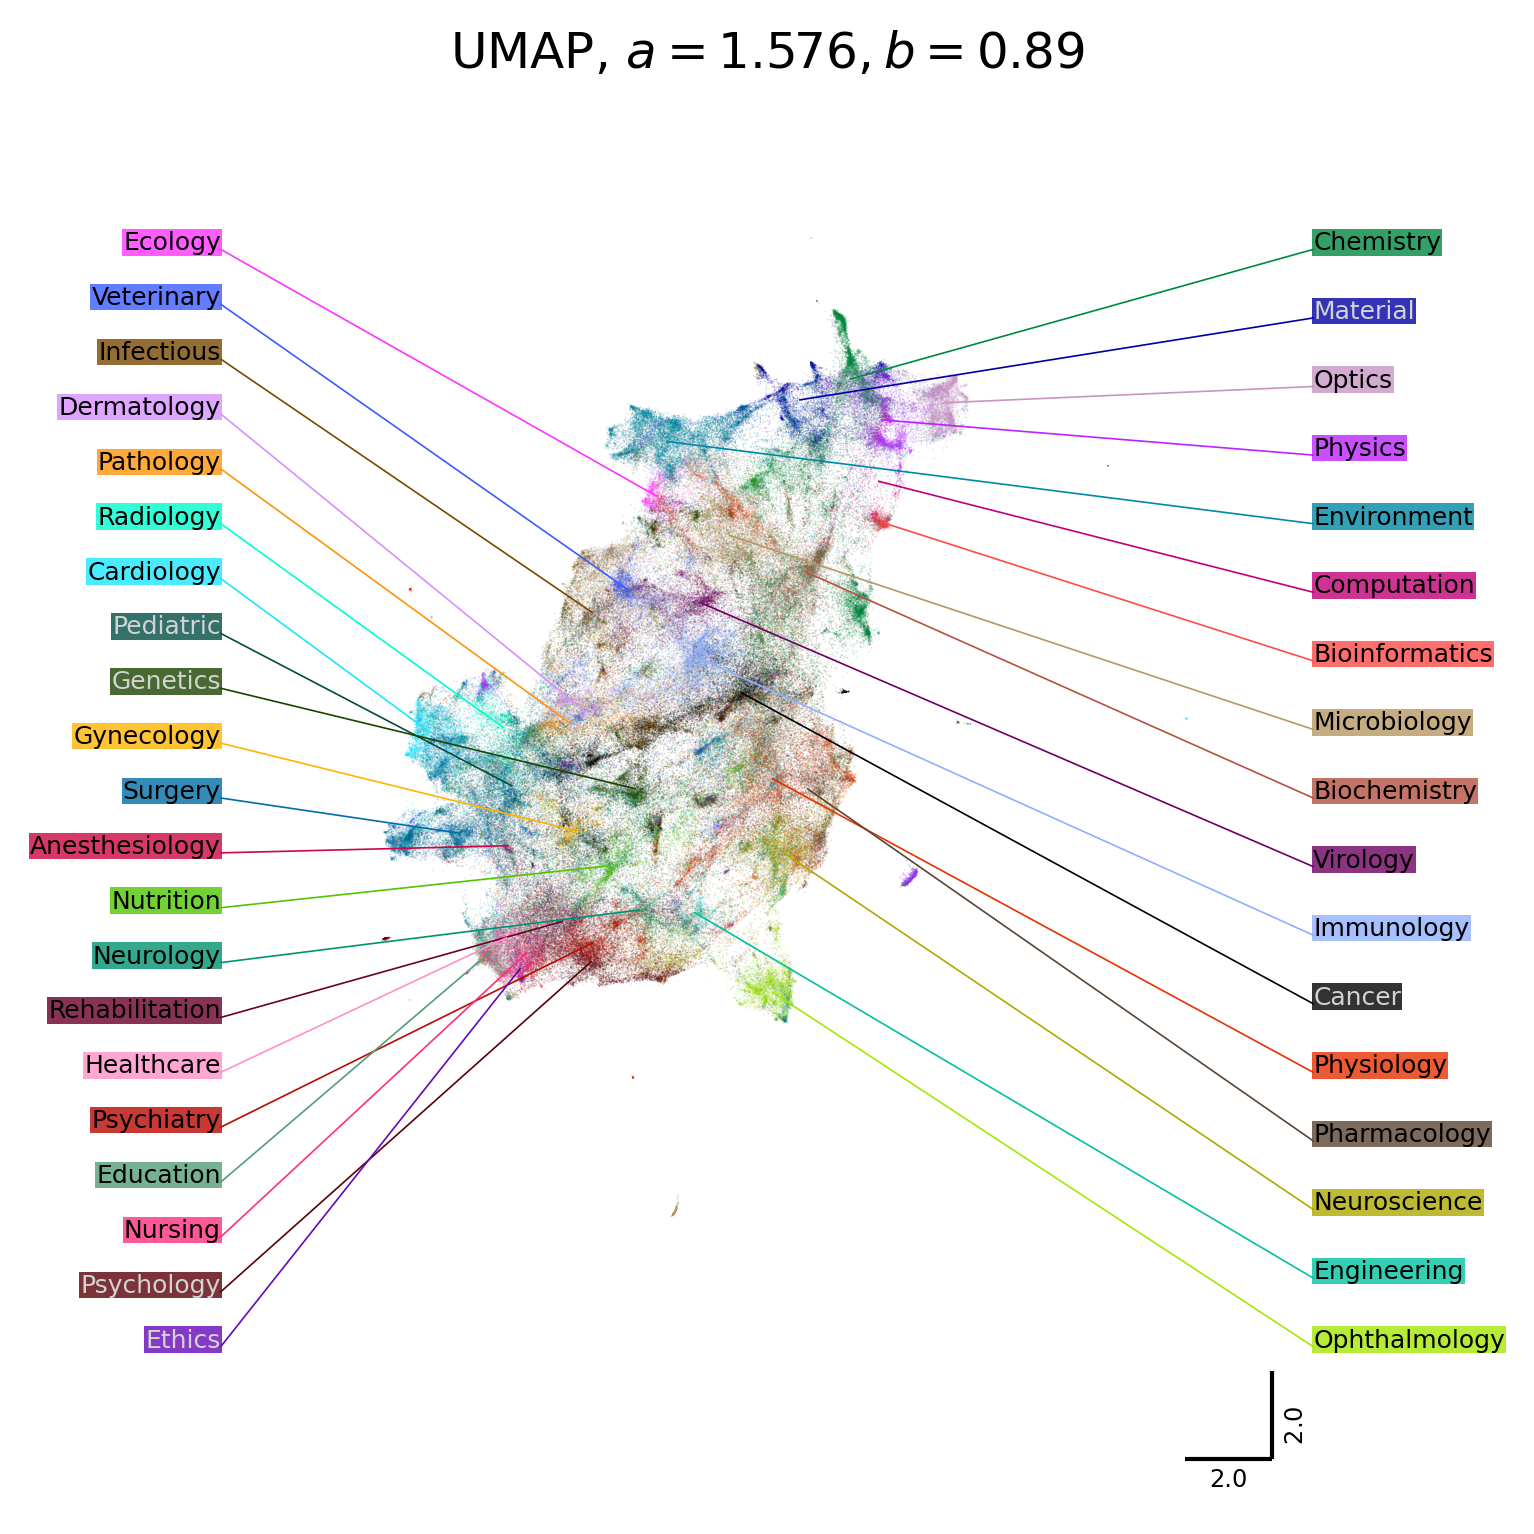

In [12]:
%matplotlib inline

from scale_bar import add_scalebar

fig, ax = plt.subplots(figsize=(5, 5), dpi=300, layout="constrained")

txtkwargs = dict(size=8, weight="bold", va="top", ha="left")
x_lim = (-10, 15)
y_lim = (-5, 20)

plot_tsne_colors(
    y_umap, colors_new, x_lim=x_lim, y_lim=y_lim, ax=ax, plot_type=None
)

add_scalebar(ax, loc=4, barwidth=1, matchx=False, matchy=False, 
                     sizey=2, sizex=2, 
                     labelx='2.0', labely='2.0',
                    fontsize='xx-small',
                    hidex=True, hidey=True)

plt.title(r'UMAP, $a=1.576,b=0.89$') 

plot_label_tags(
    y_umap,
    colors_new,
    colors_new_legend,
    x_lim=x_lim,
    y_lim=y_lim,
    ax=ax,
    fontsize=6,
    rs=2,
    subset_size = 50000
)



fig.savefig("document_fig/umap_colored_by_labels.png", dpi=400)

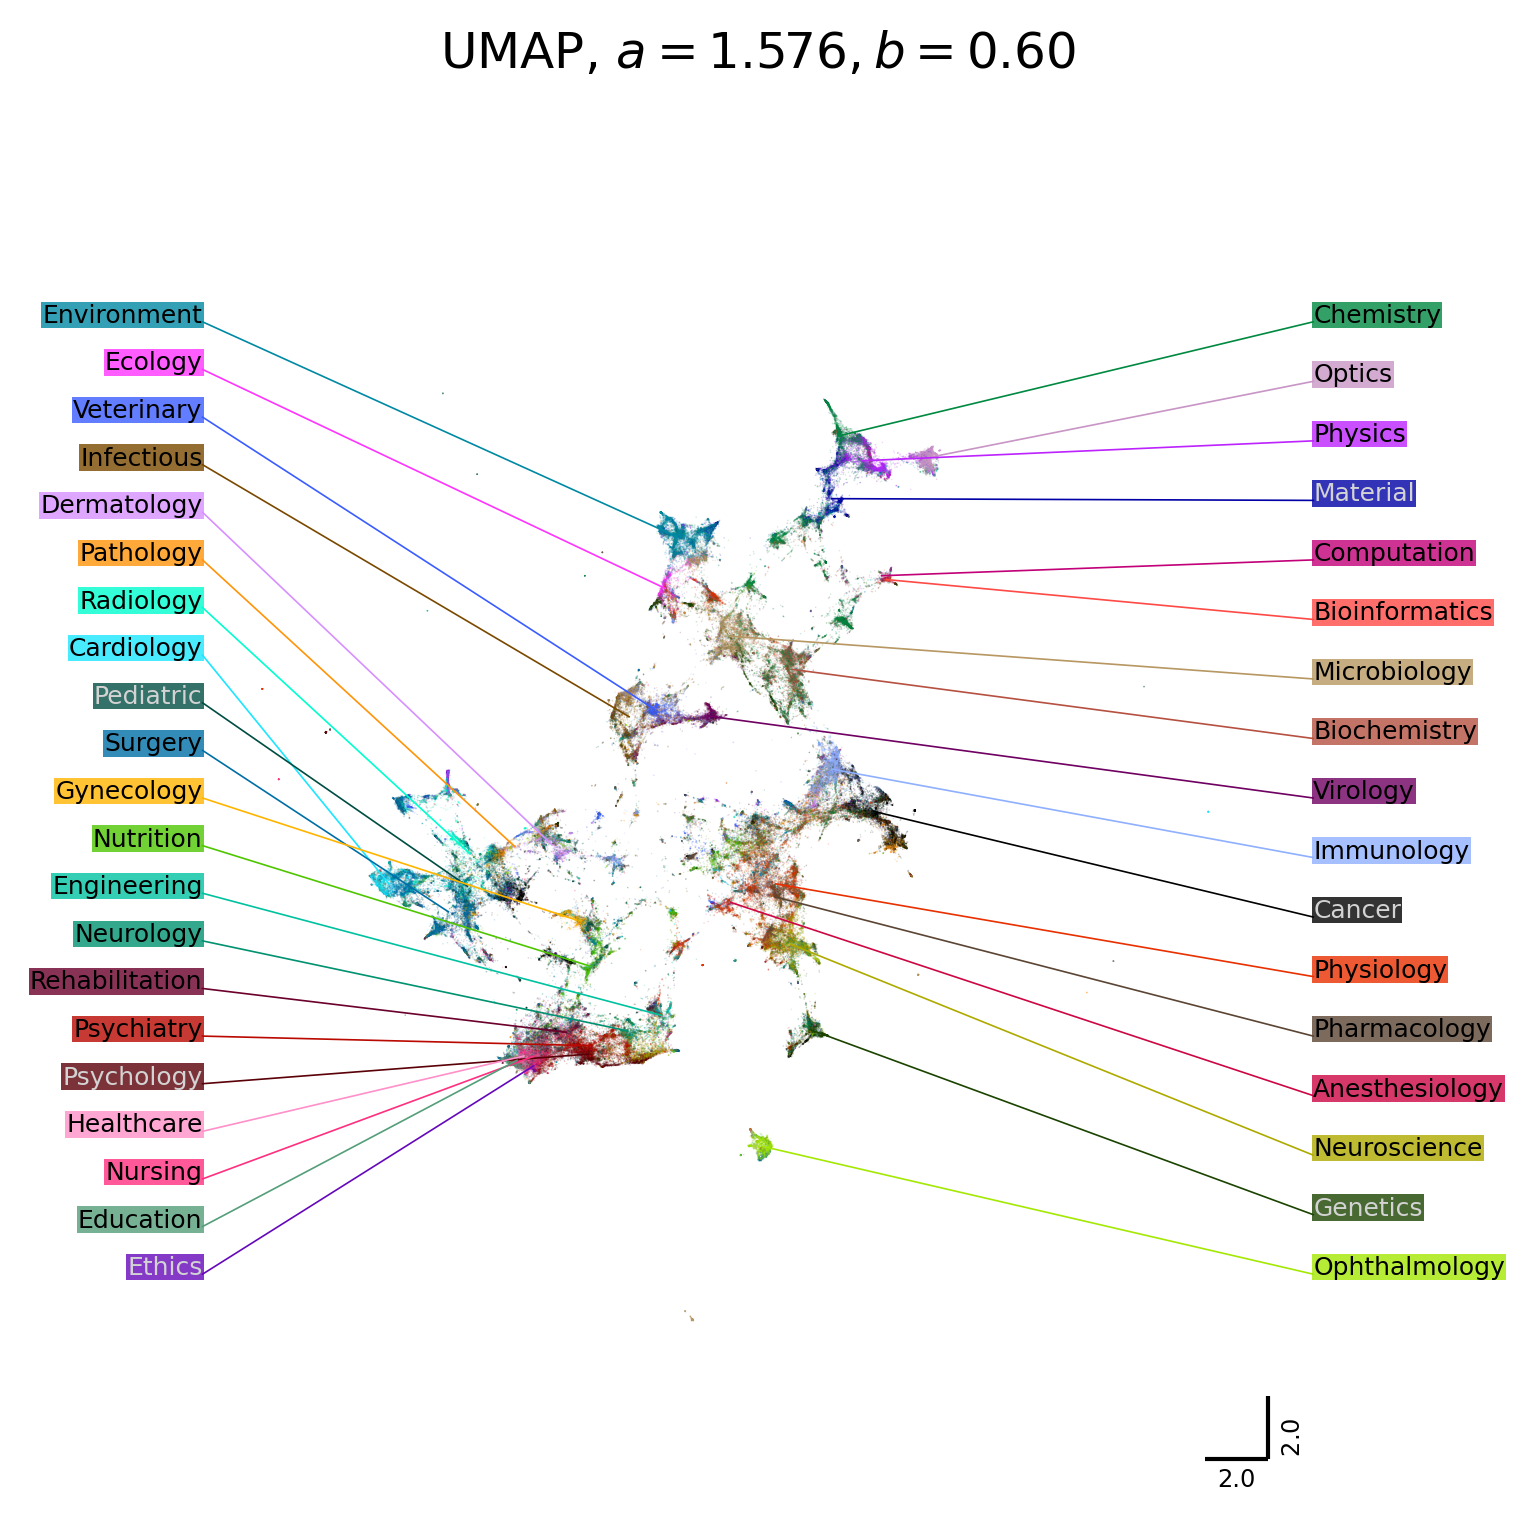

In [13]:
%matplotlib inline

from scale_bar import add_scalebar

fig, ax = plt.subplots(figsize=(5, 5), dpi=300, layout="constrained")

txtkwargs = dict(size=8, weight="bold", va="top", ha="left")
x_lim = (-15, 20)
y_lim = (-5, 25)

plot_tsne_colors(
    y_umap_2, colors_new, x_lim=x_lim, y_lim=y_lim, ax=ax, plot_type=None
)

add_scalebar(ax, loc=4, barwidth=1, matchx=False, matchy=False, 
                     sizey=2, sizex=2, 
                     labelx='2.0', labely='2.0',
                    fontsize='xx-small',
                    hidex=True, hidey=True)

plt.title(r'UMAP, $a=1.576,b=0.60$')


plot_label_tags(
    y_umap_2,
    colors_new,
    colors_new_legend,
    x_lim=x_lim,
    y_lim=y_lim,
    ax=ax,
    fontsize=6,
    rs=2,
    subset_size = 50000
)



fig.savefig("document_fig/umap_2_colored_by_labels.png", dpi=400)

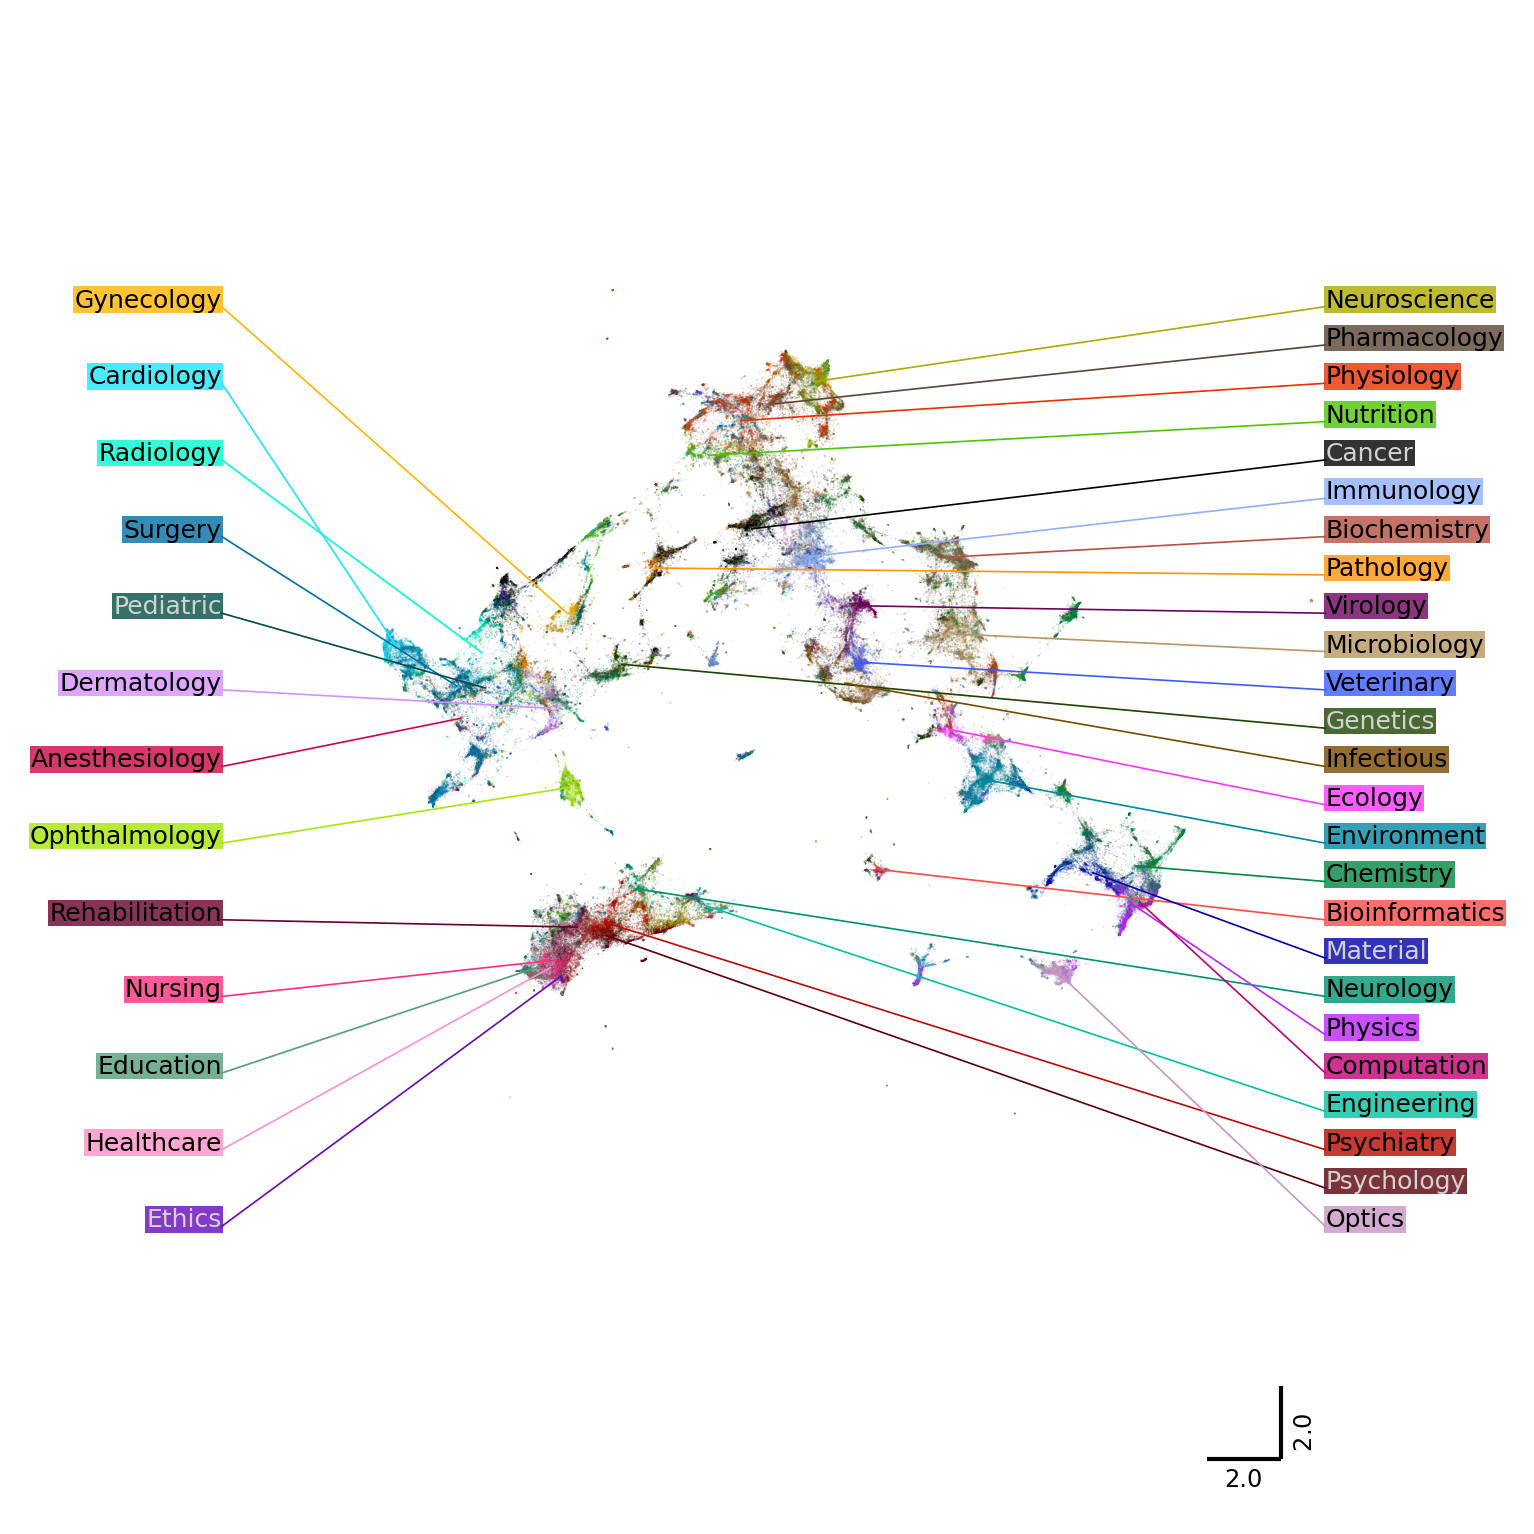

In [14]:
%matplotlib inline

from scale_bar import add_scalebar

fig, ax = plt.subplots(figsize=(5, 5), dpi=300, layout="constrained")

txtkwargs = dict(size=8, weight="bold", va="top", ha="left")
x_lim = (-10, 20)
y_lim = (-10, 15)

plot_tsne_colors(
    y_umap_pca_6, colors_new, x_lim=x_lim, y_lim=y_lim, ax=ax, plot_type=None
)

add_scalebar(ax, loc=4, barwidth=1, matchx=False, matchy=False, 
                     sizey=2, sizex=2, 
                     labelx='2.0', labely='2.0',
                    fontsize='xx-small',
                    hidex=True, hidey=True)

plot_label_tags(
    y_umap_pca_6,
    colors_new,
    colors_new_legend,
    x_lim=x_lim,
    y_lim=y_lim,
    ax=ax,
    fontsize=6,
    rs=2,
    subset_size = 50000
)



fig.savefig("document_fig/umap_colored_by_labels_pca.png", dpi=300)

<h1>kNN Accuracy</h1>

In [18]:
from pubmed_landscape_src.metrics import knn_accuracy, knn_recall

tsne_knn = knn_accuracy([embedding_train_2], colors_new, subset_size=10000)
print('TSNE:',tsne_knn)

umap_knn = knn_accuracy([y_umap,y_umap_2], colors_new, subset_size=10000)
print('UMAP: ', umap_knn)

umap_2_knn = knn_accuracy([y_umap_2], colors_new, subset_size=10000)
print('UMAP modified:', umap_2_knn)

y_umap_pca_6_knn = knn_accuracy([y_umap_pca_6], colors_new, subset_size=10000)
print('UMAP PCA:', y_umap_pca_6_knn)

TSNE: [0.5946]
UMAP:  [0.4942, 0.5548]
UMAP modified: [0.5548]
UMAP PCA: [0.5493]


In [16]:
pubmedbert_knn = knn_accuracy([X_train], colors_new, subset_size=10000)

In [17]:
print(pubmedbert_knn)

[0.6491]
